### CLASSIFICATION ANALYSIS - to forecast / predict attrition of employees

In [1]:
# import necessary libraries

# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# classifier libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

In [2]:
# import data
df = pd.read_csv(r"C:\Users\hp\Downloads\train_data1.csv")

In [3]:
#dropping off some redundant features
df.drop(['MonthlyIncome', 'MonthlyRate', 'Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

#creating a copy of the dataset for part B
df1 = df.copy()
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [4]:
#encode the categorical features to numerical ones
df1 = pd.get_dummies(df1, drop_first=True)
df1.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


In [5]:
#segment dataset into data and target label
target = df1.pop('Attrition')

In [6]:
# scale dataset features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)

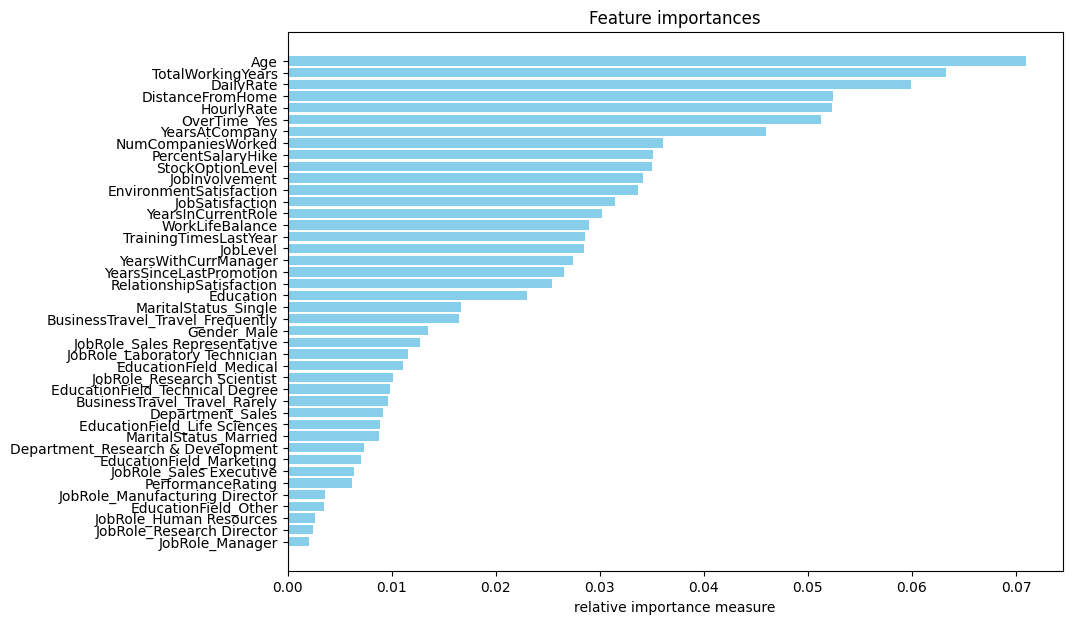

In [7]:
#identifying key featurs from the data set

# using a random classifier model to identify the importance features

# fit the model
model = RandomForestClassifier()
model.fit(df_scaled,target)
importances = model.feature_importances_
sort_imp = np.argsort(importances)
names = list(df1.columns)

#plot feature importance chart
plt.figure(figsize=(10,7))
plt.barh(range(len(sort_imp)),importances[sort_imp], color="skyblue")
plt.yticks(range(len(sort_imp)),[names[x] for x in sort_imp])
plt.title("Feature importances")
plt.xlabel("relative importance measure");

### Phase 2
- Splitting data into training and evaluation datasets
- Implementing Machine Learning/model Building and Training
- creating a predictions file

In [8]:
# split the DataFrame into train and test datasets
x_train,x_test,y_train,y_test = train_test_split(df_scaled,target,test_size=0.2,random_state=1)

In [9]:
# Fit a linear regression model on the training set
#instantiate model
lreg = LogisticRegression()

#fit model (training model)
lreg.fit(x_train,y_train)

LogisticRegression()

In [10]:
lreg_predict = lreg.predict(x_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, lreg_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       173
           1       0.79      0.38      0.52        39

    accuracy                           0.87       212
   macro avg       0.83      0.68      0.72       212
weighted avg       0.86      0.87      0.85       212



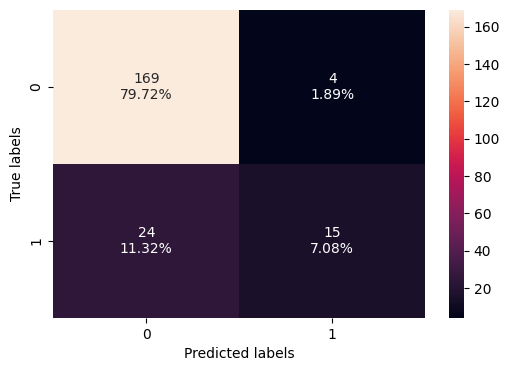

In [12]:
cm = confusion_matrix(y_test, lreg_predict)

labels = np.array(
    [
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True labels")
plt.xlabel("Predicted labels")
plt.show()

### Hyperparameter optimization

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingClassifier()

# Try these hyperparameter values
params = {
    'learning_rate': [0.1,0.5,1],
    'n_estimators' : [50,100,150]
}

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
grid = GridSearchCV(alg,params,scoring=score, cv=3)
grid.fit(x_train,y_train)
print("Best parameter combination:", grid.best_params_, "\n")

# measuring performance on test set
print ("Applying best model on test data:")
best_mod = grid.best_estimator_
pred = best_mod.predict(x_test)

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

Applying best model on test data:


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       173
           1       0.43      0.26      0.32        39

    accuracy                           0.80       212
   macro avg       0.64      0.59      0.60       212
weighted avg       0.77      0.80      0.78       212



- Logistic Regression gave a higher accuracy value that the optimized model. Hence, logistic regression is the best model for the prediction of attrition

### Productionizing Our Model - simulating the use of the model on a new dataset and using it to make relevant predictions

In [15]:
# importing prediction data
predict_data = pd.read_excel(r"C:\Users\hp\Downloads\test2.xlsx")

In [16]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       412 non-null    int64 
 1   BusinessTravel            412 non-null    object
 2   DailyRate                 412 non-null    int64 
 3   Department                412 non-null    object
 4   DistanceFromHome          412 non-null    int64 
 5   Education                 412 non-null    int64 
 6   EducationField            412 non-null    object
 7   EmployeeCount             412 non-null    int64 
 8   EmployeeNumber            412 non-null    int64 
 9   EnvironmentSatisfaction   412 non-null    int64 
 10  Gender                    412 non-null    object
 11  HourlyRate                412 non-null    int64 
 12  JobInvolvement            412 non-null    int64 
 13  JobLevel                  412 non-null    int64 
 14  JobRole                   

In [17]:
# Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# save model as a pickle file
filename = './attrition_mod.pkl'
joblib.dump(lreg, filename)

['./attrition_mod.pkl']

In [18]:
#apply transforms to the new data similar to the training dataset
predict_data.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'], axis=1, inplace=True)
predict_data = pd.get_dummies(predict_data, drop_first=True)

In [19]:
# inferencing
prediction = lreg.predict(predict_data)
predict_data['PredictedAttrition'] = prediction